In [ ]:
# Hypothesis generation with respect to problem statement
# a)	Item weight might affect a sale of the product.
# b)	Are the items with more MRP have more item outlet sales?
# c)	Are the items contain low fat have more sales than the items contain regular fat?
# d)	Skewness in distribution of Item_Outlet_Sales for different Item Fat Contents. 
# e)	More Item_Visibility of a particular product may be costlier than other products.
# f)	Does Item type could have an affect on the sales?
# g)	Size of the stores could have an affect on the item sales at a particular store.
# h)	Which size stores have more item Outlet Sales?
# i)	Are the stores of different outlets types have same Outlet Sales? 
# j)	Does the Supermarket TYPE 1 type of stores have more outlet sales than other type of stores?
# k)	Are the stores located in different Outlet location affect the sales?
# l)	Are the stores which have established earlier have more sales?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = r'C:\Users\emmam\Documents\nlb\data\BigMart_Sales.csv'


In [15]:
df=pd.read_csv(data_path)
display(
    df.sample(10),
    df.info(),
       )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4471,FDV19,14.85,Regular,0.035228,Fruits and Vegetables,159.5578,OUT013,1987,High,Tier 3,Supermarket Type1,2085.9514
1669,FDH08,7.51,Low Fat,0.017429,Fruits and Vegetables,229.6010,OUT046,1997,Small,Tier 1,Supermarket Type1,6201.9270
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
3446,NCG54,12.10,Low Fat,0.079968,Household,170.8106,OUT045,2002,NaN,Tier 2,Supermarket Type1,4619.9862
6011,FDY13,12.10,LF,0.030174,Canned,76.6670,OUT049,1999,Medium,Tier 1,Supermarket Type1,1531.3400
7649,FDD08,8.30,Low Fat,0.035409,Fruits and Vegetables,36.2506,OUT049,1999,Medium,Tier 1,Supermarket Type1,834.9132
3602,FDY11,6.71,reg,0.029681,Baking Goods,65.0142,OUT018,2009,Medium,Tier 3,Supermarket Type2,856.8846
606,FDW49,19.50,Low Fat,0.082720,Canned,179.3002,OUT045,2002,NaN,Tier 2,Supermarket Type1,2865.6032
5558,NCS29,9.00,Low Fat,0.069532,Health and Hygiene,266.5884,OUT035,2004,Small,Tier 2,Supermarket Type1,6624.7100
8199,FDR34,17.00,Regular,0.016030,Snack Foods,228.0352,OUT018,2009,Medium,Tier 3,Supermarket Type2,2748.4224


None

In [62]:
# a)	Item weight might affect a sale of the product.

def f_ttl_sold(df, markup):
    return( 
        int(np.divide(df['Item_Outlet_Sales'], df['Item_MRP']*markup ))
    )

df['ttl_sold_guess'] = df.apply(f_ttl_sold, args=(1.5,), axis=1)

print(
    f"""
    Generally speaking,
    Item weight correlation to total units sold : {df.corr()['Item_Weight']['ttl_sold_guess']}
    Correlation is negative (which could suggest increased weight may decrease units sold)
    but correlation is very minimal.
    
    """)
    
dict_by_itemtype_corr_weight_sold = {i_t : (df[df['Item_Type']==i_t].corr()['Item_Weight']['ttl_sold_guess'], df[df['Item_Type']==i_t].corr().abs()['Item_Weight']['ttl_sold_guess'] ) for i_t in df['Item_Type'].unique()}
    
display(
    "strongest to weakest correlation to units sold by item type",
    "(category,     corr,     abs(corr))",
    sorted(dict_by_itemtype_corr_weight_sold.items(), key=lambda i:i[1][1], reverse=True),
    "We can see that for seafood items, heavier items sold better.",
    "For 'Others' and 'Baking Goods', heavier items sold slightly worse.",
)


    Generally speaking,
    Item weight correlation to total units sold : -0.012194054718233193
    Correlation is negative (which could suggest increased weight may decrease units sold)
    but correlation is very minimal.
    
    


'strongest to weakest correlation to units sold by item type'

'(category,     corr,     abs(corr))'

[('Seafood', (0.2278721573563011, 0.2278721573563011)),
 ('Others', (-0.16671016944787834, 0.16671016944787834)),
 ('Baking Goods', (-0.10822289954257482, 0.10822289954257482)),
 ('Breakfast', (0.09447893815771802, 0.09447893815771802)),
 ('Hard Drinks', (0.07036971781853431, 0.07036971781853431)),
 ('Meat', (-0.06982543205929942, 0.06982543205929942)),
 ('Dairy', (-0.046261710906903473, 0.046261710906903473)),
 ('Breads', (-0.03419879118338706, 0.03419879118338706)),
 ('Fruits and Vegetables', (-0.026810804198690086, 0.026810804198690086)),
 ('Health and Hygiene', (0.02630908057999345, 0.02630908057999345)),
 ('Household', (0.024396482639563545, 0.024396482639563545)),
 ('Soft Drinks', (0.015784290399945812, 0.015784290399945812)),
 ('Canned', (0.015152228152742288, 0.015152228152742288)),
 ('Starchy Foods', (-0.013663480500294256, 0.013663480500294256)),
 ('Frozen Foods', (0.013508663737727883, 0.013508663737727883)),
 ('Snack Foods', (0.0019118583075576079, 0.0019118583075576079))]

'We can see that for seafood items, heavier items sold better.'

"For 'Others' and 'Baking Goods', heavier items sold slightly worse. "

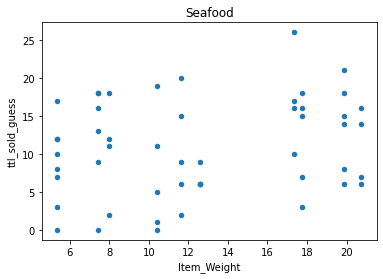

In [69]:
df[df['Item_Type']=="Seafood"].plot.scatter(x='Item_Weight', y='ttl_sold_guess', title='Seafood')
plt.show()

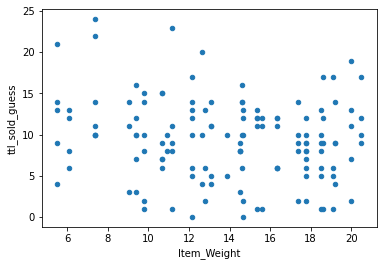

In [68]:
df[df['Item_Type']=="Others"].plot.scatter(x='Item_Weight', y='ttl_sold_guess', title='Others')
plt.show()

'Item_MRP corr to total sold'

0.01150000772405833

'strongest to weakest correlation MRP to est units sold'

'(category,     corr,     abs(corr))'

[('Breakfast', (0.1558066519966166, 0.1558066519966166)),
 ('Frozen Foods', (0.06738755367319363, 0.06738755367319363)),
 ('Breads', (-0.04498206637803512, 0.04498206637803512)),
 ('Dairy', (0.04496057910971878, 0.04496057910971878)),
 ('Others', (-0.0442481956536594, 0.0442481956536594)),
 ('Fruits and Vegetables', (0.03560174678136085, 0.03560174678136085)),
 ('Soft Drinks', (-0.03384482954660516, 0.03384482954660516)),
 ('Health and Hygiene', (-0.026769109339632908, 0.026769109339632908)),
 ('Hard Drinks', (0.025742358780179067, 0.025742358780179067)),
 ('Baking Goods', (0.023848567951696667, 0.023848567951696667)),
 ('Household', (-0.02366127044313903, 0.02366127044313903)),
 ('Starchy Foods', (-0.006271361020550089, 0.006271361020550089)),
 ('Snack Foods', (-0.005115224499283061, 0.005115224499283061)),
 ('Canned', (-0.0039659982568724305, 0.0039659982568724305)),
 ('Seafood', (0.0031450779938842917, 0.0031450779938842917)),
 ('Meat', (0.001280562973047981, 0.001280562973047981))]

'We can see that more expensive Breakfast items sold better than cheaper breakfast items.'

<AxesSubplot:xlabel='Item_MRP', ylabel='ttl_sold_guess'>

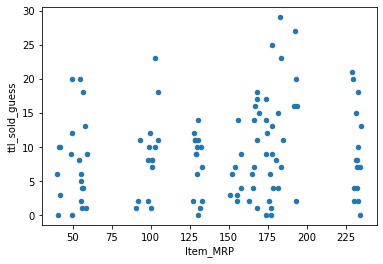

In [76]:
# b)	Are the items with more MRP have more item outlet sales?

display("Item_MRP corr to total sold",
    df.corr()['Item_MRP']['ttl_sold_guess']
)

dict_by_itemtype_corr_mrp_sold = {i_t : (df[df['Item_Type']==i_t].corr()['Item_MRP']['ttl_sold_guess'], df[df['Item_Type']==i_t].corr().abs()['Item_MRP']['ttl_sold_guess'] ) for i_t in df['Item_Type'].unique()}

    
display(
    "strongest to weakest correlation MRP to est units sold",
    "(category,     corr,     abs(corr))",
    sorted(dict_by_itemtype_corr_mrp_sold.items(), key=lambda i:i[1][1], reverse=True),
    "We can see that more expensive Breakfast items sold better than cheaper breakfast items."
)

df[df['Item_Type']=='Breakfast'].plot.scatter(x='Item_MRP', y='ttl_sold_guess')